### Project on Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [39]:
df = pd.read_csv('economic_index.csv')
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [3]:
df.isna().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [4]:
# deleting unnecessary columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

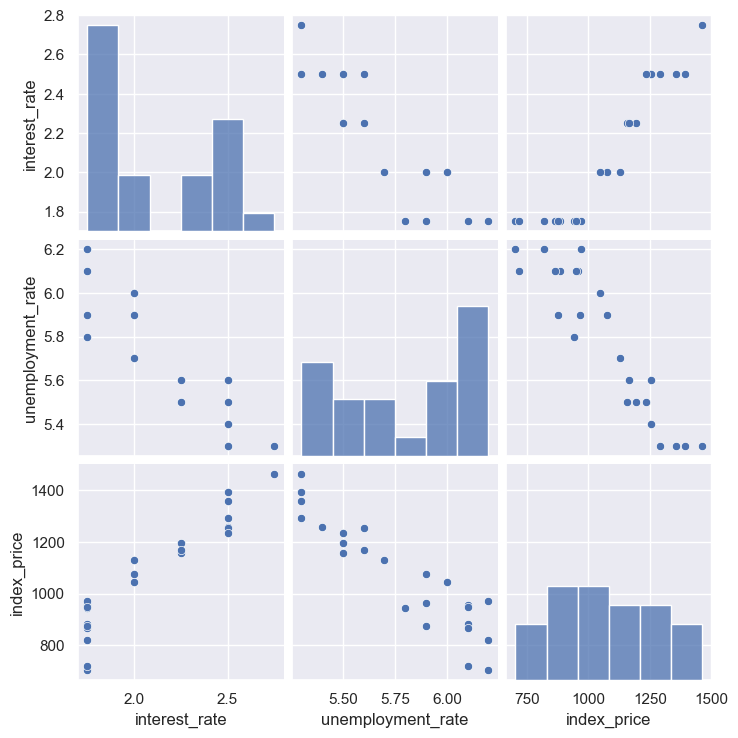

In [5]:
#visualiziation 
sns.pairplot(df)

In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

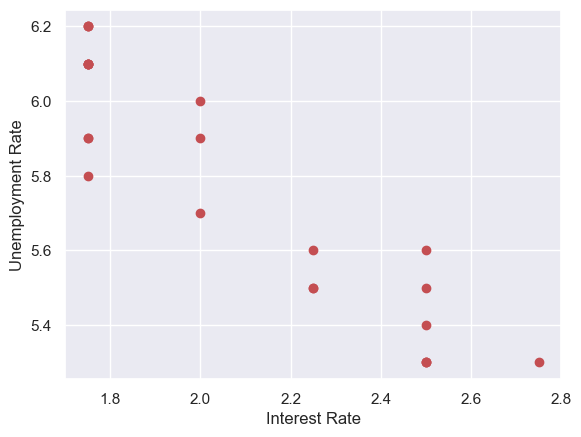

In [7]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color= 'r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')


In [8]:
# independant and dependent feature
X = df[['interest_rate','unemployment_rate']]
y = df['index_price']

In [9]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


### Train Test Split

In [10]:
# train test split
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)

In [14]:
X_test = sc.transform(X_test)

In [15]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [16]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

### Cross Validation

it is function that use to check how accurate the model score is. it divides training data into again train and test and calculate negative MSE which later on take average of these MSE

In [20]:
# cross validation - 
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [21]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [22]:
np.mean(validation_score)

np.float64(-5914.828180162386)

### Prediction

In [23]:
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


5793.762887712569
59.935781523235484
76.11677139574805


In [26]:
# R2 Calculation
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.8278978091457145

In [27]:
#adjisted R2
adj_r2 = (1 - (1 - r2) * (len(y_test) - 1)/(len(y_test) -X_test.shape[1] - 1))
adj_r2

0.7131630152428576

### Assumptions

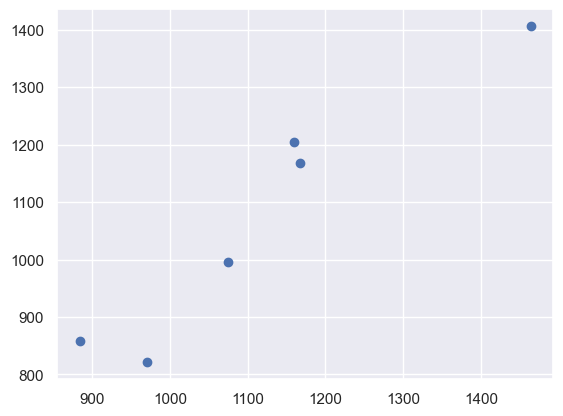

In [28]:
plt.scatter(y_test,y_pred)

In [29]:
# residuals = error between y_test , y_pred
residual = y_test - y_pred
residual

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

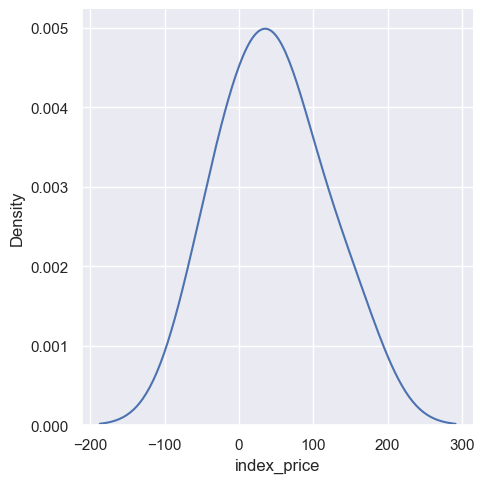

In [30]:
#plot this residuals
sns.displot(residual,kind='kde')
#kde = kernal density estimation

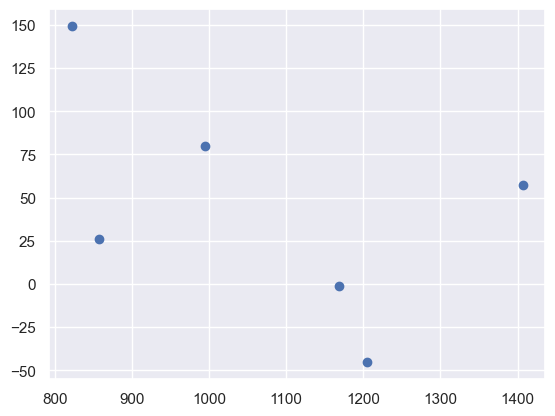

In [32]:
#plotting y_pred, residuals
plt.scatter(y_pred,residual)

#this is uniformly distributed it means model is good. In this case it is uniformly distributes so model is good
#if it forllow some patters means something is wrong in model building

### OLS

In [34]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [35]:
model.summary()

C:\Users\Win\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 11 Oct 2025   Prob (F-statistic):                       0.754
Time:                        16:11:01   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(regression.coef_)
#this ensures both OLS result and this coeff result is same

[  88.27275507 -116.25716066]


### Applying on new Data

In [40]:
regression.predict(sc.transform([[1.85,5.8]]))

C:\Users\Win\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([991.91773635])